# Submitetd by - 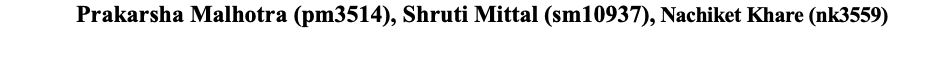


#Pytorch on CIFAR-10 Dataset with Batch Normalisation and Dropout on Convolution Layers output after the activation function 

In [ ]:
# # Install torchvision
# !pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
'''ResNet in PyTorch.
Reference:
[1] Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun
    Deep Residual Learning for Image Recognition.
[2] https://github.com/kuangliu/pytorch-cifar
[3] https://github.com/abhisikdar/RESNET18-CIFAR10 
[4] https://www.srose.biz/wp-content/uploads/2020/08/Batch-Size-and-Epochs.html  
'''
import torch
import torch.nn as nn
import torch.nn.functional as F
# import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torch.backends.cudnn as cudnn
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
from torchsummary import summary
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import decomposition
from sklearn import manifold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
from tqdm import tqdm
import random


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )
        # Dropout after Convolutional BasicBlock
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.dropout(out)
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out




class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)
        self.dropout = nn.Dropout(0.25)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.dropout(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


def test():
    net = ResNet18()
    y = net(torch.randn(1, 3, 32, 32))
    print(y.size())

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
layers=[1, 1, 1, 1]
model1 = ResNet(BasicBlock, layers).to(device)
summary(model1, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
           Dropout-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,864
       BatchNorm2d-5           [-1, 64, 32, 32]             128
           Dropout-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]          36,864
       BatchNorm2d-8           [-1, 64, 32, 32]             128
        BasicBlock-9           [-1, 64, 32, 32]               0
           Conv2d-10          [-1, 128, 16, 16]          73,728
      BatchNorm2d-11          [-1, 128, 16, 16]             256
          Dropout-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 128, 16, 16]         147,456
      BatchNorm2d-14          [-1, 128,

In [ ]:
class Model2(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(Model2, self).__init__()
        self.in_planes = 16

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = self._make_layer(block, 16, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 64, num_blocks[2], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.linear = nn.Linear(64, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        downsample = None
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        return x

    
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
layers=[1, 1, 1, 1]
model2 = Model2(BasicBlock, layers).to(device)
summary(model2, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
            Conv2d-3           [-1, 16, 32, 32]           2,304
       BatchNorm2d-4           [-1, 16, 32, 32]              32
           Dropout-5           [-1, 16, 32, 32]               0
            Conv2d-6           [-1, 16, 32, 32]           2,304
       BatchNorm2d-7           [-1, 16, 32, 32]              32
        BasicBlock-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 32, 16, 16]           4,608
      BatchNorm2d-10           [-1, 32, 16, 16]              64
          Dropout-11           [-1, 32, 16, 16]               0
           Conv2d-12           [-1, 32, 16, 16]           9,216
      BatchNorm2d-13           [-1, 32, 16, 16]              64
           Conv2d-14           [-1, 32,

In [ ]:
# import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torch.backends.cudnn as cudnn

print('Is CUDA available', torch.cuda.is_available())
print('Torch', torch.__version__, 'CUDA', torch.version.cuda)
print('Device:', torch.device('cuda:0'))

Is CUDA available False
Torch 2.0.0+cu118 CUDA 11.8
Device: cuda:0


# Data Pre-processing</br>
1. Random cropping, with size 32x32 and padding 4</br>
2. Random horizontal flipping with a probability of 0.5</br>
3. Normalize each image’s RGB channel with mean() and std()</br>

In [ ]:
data_path='../data/'
cifar=datasets.CIFAR10(data_path, train= True, download=True, transform=transforms.ToTensor())
cifar_val=datasets.CIFAR10(data_path, train=False, download= True, transform=transforms.ToTensor())

100%|██████████| 170498071/170498071 [00:06<00:00, 28370547.93it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data/
Files already downloaded and verified


In [ ]:
cifar_stack = torch.stack([img for img, _ in cifar], dim=3)
print('Shape of the CIFAR stack is',cifar_stack.shape)
mean= cifar_stack.view(3,-1).mean(dim=1)
std= cifar_stack.view(3,-1).std(dim=1)
print('Mean of training data is', mean)
print('Standard deviation of training data is', std)

Shape of the CIFAR stack is torch.Size([3, 32, 32, 50000])
Mean of training data is tensor([0.4914, 0.4822, 0.4465])
Standard deviation of training data is tensor([0.2470, 0.2435, 0.2616])


In [ ]:
cifar_transformed = datasets.CIFAR10(data_path,train=True,download=False, transform=transforms.Compose([
                                                                                                      transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),transforms.ToTensor(),transforms.Normalize(mean,std)
]))
cifar_val_transformed = datasets.CIFAR10(data_path,train=False,download=False, transform=transforms.Compose([
                                                                                                      transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),transforms.ToTensor(),transforms.Normalize(mean,std)
]))

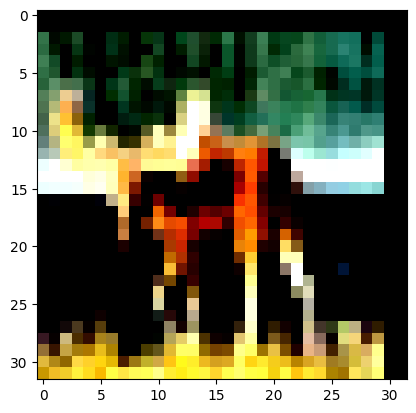

In [ ]:
# View images

img, label = cifar_transformed[28]
plt.imshow(img.permute(1, 2, 0))    
plt.show()

#Varied the batch size for training dataset with other parameters fixed to measure the effect of batch size.</br>
Now, our Data is ready for Training.</br>


In [ ]:
# Parameters
# Model 2 with varying batch sizebatch_size=[256,512]
val_batch_size=100
num_epochs=30
# learning_rate=0.1

dev=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

max_validation = 0
max_epoch=0
val3_acc=[]
train3_acc=[]
epochs=[]
from torch.utils.data import DataLoader

#dataloader = DataLoader(dataset, batch_size=32, num_workers=2)


In [ ]:
# Looping over different batch sizes
for batch_no in range(len(batch_size)):
  # Train/Test Data
  # Creating data loaders for training, testing, and validation data with batch sizes as specified in batch_size list
  train_loader = torch.utils.data.DataLoader(cifar_transformed, batch_size=batch_size[batch_no], shuffle=True, num_workers=4)
  train_acc_loader = torch.utils.data.DataLoader(cifar_transformed, batch_size=val_batch_size, shuffle=False, num_workers=4)
  val_loader = torch.utils.data.DataLoader(cifar_val_transformed, batch_size=val_batch_size, shuffle=False, num_workers=4)

  # Model
  # Creating a ResNet18 model and setting the device where the model will be trained
  resnet18 = model2
  resnet18 = resnet18.to(dev)
  # Defining loss function and optimizer
  loss_func = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(resnet18.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
  # Learning rate scheduler for optimizer
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)

  # Looping over number of epochs
  for i in range(num_epochs):
    # Training
    # Looping over batches of data and performing forward and backward pass
    for imgs, labels in train_loader:
      if dev is not None:
        imgs, labels = imgs.to(dev), labels.to(dev)
      out = resnet18(imgs)
      loss = loss_func(out, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    
    # Initializing counters for calculating accuracy
    correct_val = 0
    total_val = 0
    correct_train_acc = 0
    total_train_acc = 0

    # Testing
    # Looping over test data batches and calculating accuracy
    with torch.no_grad():
      for imgs, labels in val_loader:
        if dev is not None:
          imgs, labels = imgs.to(dev), labels.to(dev)
        outputs = resnet18(imgs)
        _, predicted = torch.max(outputs, dim=1)
        total_val += labels.shape[0]
        correct_val += int((predicted == labels).sum())
      val3_acc.append(correct_val / total_val)

    # Computing Loss and Accuracy on training data
      for train_acc_imgs, train_acc_labels in train_acc_loader:
        if dev is not None:
          train_acc_imgs, train_acc_labels = train_acc_imgs.to(dev), train_acc_labels.to(dev)
        train_acc_out = resnet18(train_acc_imgs)
        _, train_acc_predicted = torch.max(train_acc_out, dim=1)
        total_train_acc += train_acc_labels.shape[0]
        correct_train_acc += int((train_acc_predicted == train_acc_labels).sum())
      train3_acc.append(correct_train_acc / total_train_acc)
      
      # Saving the model with the highest validation accuracy
      if correct_val / total_val > max_validation:
        max_validation = correct_val / total_val
        max_epoch = i
        torch.save(resnet18, './scratch.pt')

    epochs.append(i)

    # Printing the training and validation accuracy for every epoch
    if i % 1 == 0:
      print("Epoch no %d:\t Train Loss: %f \t Train Accuracy: %f \t Validation Accuracy: %f" % (i + 1, float(loss), correct_train_acc / total_train_acc, correct_val / total_val))
    
    # Updating the learning rate using the scheduler

    
    scheduler.step()

  print(max_validation)



Epoch no 1:	 Train Loss: 1.117293 	 Train Accuracy: 0.607600 	 Validation Accuracy: 0.591100
Epoch no 2:	 Train Loss: 0.880120 	 Train Accuracy: 0.660740 	 Validation Accuracy: 0.634400
Epoch no 3:	 Train Loss: 0.806495 	 Train Accuracy: 0.681340 	 Validation Accuracy: 0.652000
Epoch no 4:	 Train Loss: 0.781968 	 Train Accuracy: 0.698440 	 Validation Accuracy: 0.658800
Epoch no 5:	 Train Loss: 0.798060 	 Train Accuracy: 0.723840 	 Validation Accuracy: 0.702000
Epoch no 6:	 Train Loss: 0.684382 	 Train Accuracy: 0.738480 	 Validation Accuracy: 0.700100
Epoch no 7:	 Train Loss: 0.684458 	 Train Accuracy: 0.756320 	 Validation Accuracy: 0.716000
Epoch no 8:	 Train Loss: 0.786326 	 Train Accuracy: 0.757920 	 Validation Accuracy: 0.720300
Epoch no 9:	 Train Loss: 0.643051 	 Train Accuracy: 0.769080 	 Validation Accuracy: 0.723400
Epoch no 10:	 Train Loss: 0.638852 	 Train Accuracy: 0.777400 	 Validation Accuracy: 0.739800
Epoch no 11:	 Train Loss: 0.680314 	 Train Accuracy: 0.775800 	 Valid

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f74581b54c0>
Exception ignored in: Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    <function _MultiProcessingDataLoaderIter.__del__ at 0x7f74581b54c0>self._shutdown_workers()
Traceback (most recent call last):

  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
      File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
self._shutdown_workers()    
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
if w.is_alive():    
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
if w.is_alive():AssertionError
  File "/usr/lib/python3.9/multiprocessing/process.py"

Epoch no 18:	 Train Loss: 0.537938 	 Train Accuracy: 0.793420 	 Validation Accuracy: 0.736600
Epoch no 19:	 Train Loss: 0.580487 	 Train Accuracy: 0.801880 	 Validation Accuracy: 0.759100
Epoch no 20:	 Train Loss: 0.569386 	 Train Accuracy: 0.812720 	 Validation Accuracy: 0.757200
Epoch no 21:	 Train Loss: 0.514566 	 Train Accuracy: 0.809180 	 Validation Accuracy: 0.746400
Epoch no 22:	 Train Loss: 0.574617 	 Train Accuracy: 0.801080 	 Validation Accuracy: 0.743700
Epoch no 23:	 Train Loss: 0.566149 	 Train Accuracy: 0.810760 	 Validation Accuracy: 0.765000
Epoch no 24:	 Train Loss: 0.550066 	 Train Accuracy: 0.816040 	 Validation Accuracy: 0.759300
Epoch no 25:	 Train Loss: 0.462372 	 Train Accuracy: 0.820640 	 Validation Accuracy: 0.749700
Epoch no 26:	 Train Loss: 0.524294 	 Train Accuracy: 0.822560 	 Validation Accuracy: 0.765600
Epoch no 27:	 Train Loss: 0.528929 	 Train Accuracy: 0.822680 	 Validation Accuracy: 0.760800
Epoch no 28:	 Train Loss: 0.467284 	 Train Accuracy: 0.82080

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f74581b54c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1462, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.9/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f74581b54c0>
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f74581b54c0>Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py", line 1479, in __del__

    Traceback (most recent call last):
self._shutdown_workers()  File "/usr/local/lib/python3.

Epoch no 30:	 Train Loss: 0.470613 	 Train Accuracy: 0.827100 	 Validation Accuracy: 0.768700
0.7687


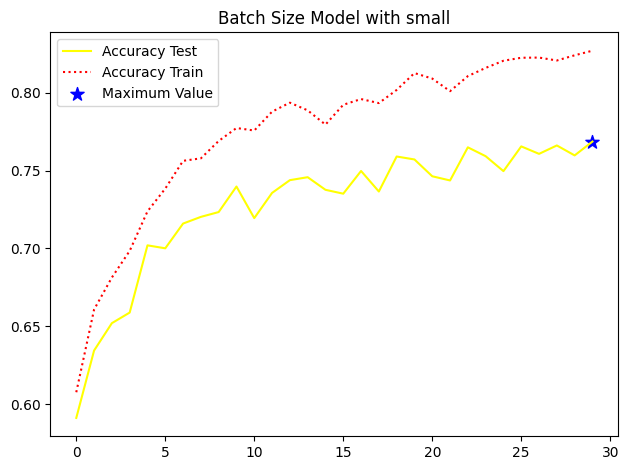

In [ ]:
  #Small NORMAL
  # Plot Train Accuracy vs Test Accuracy
  plt.plot(epochs, val3_acc, label="Accuracy Test", color="yellow", linestyle='-')
  plt.plot(epochs, train3_acc, label="Accuracy Train", color="red",linestyle=':')
  plt.scatter([max_epoch], [max_validation],color="blue", marker="*", label="Maximum Value", s=100 )
  plt.title("Batch Size Model with small")
  plt.legend()
  plt.tight_layout()
  plt.show()

In [ ]:
# Parameters
#Model 1 with varying batch size
batch_size=[256,512]
val_batch_size=100
num_epochs=10
# learning_rate=0.1

dev=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

max_validation = 0
max_epoch=0
val1_acc=[]
train1_acc=[]
epochs=[]
from torch.utils.data import DataLoader

#dataloader = DataLoader(dataset, batch_size=32, num_workers=2)


In [ ]:
# Loop over different batch sizes for training
for batch_no in range(len(batch_size)):
  # Train/Test Data
  # Create DataLoader objects for training, train accuracy evaluation, and validation
  train_loader=torch.utils.data.DataLoader(cifar_transformed,batch_size=batch_size[batch_no],shuffle=True, num_workers=4)
  train_acc_loader=torch.utils.data.DataLoader(cifar_transformed,batch_size=val_batch_size,shuffle=False, num_workers=4)
  val_loader = torch.utils.data.DataLoader(cifar_val_transformed, batch_size=val_batch_size, shuffle=False, num_workers=4)

  # Model
  # Initialize a ResNet18 model, set up loss function, optimizer, and learning rate scheduler
  resnet18 =model1
  resnet18=resnet18.to(dev)
  loss_func= torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(resnet18.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)

  # Loop over epochs
  for i in range(num_epochs):
    # Training
    # Loop over training batches, calculate loss and optimize model parameters
    for imgs, labels in train_loader:
      if dev is not None:
        imgs,labels=imgs.to(dev),labels.to(dev)
      out= resnet18(imgs)
      loss=loss_func(out,labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    
    # Testing
    # Evaluate validation accuracy by looping over validation batches
    # Calculate training accuracy by looping over train accuracy evaluation batches
    correct_val = 0
    total_val = 0
    correct_train_acc=0
    total_train_acc=0
    with torch.no_grad():
      for imgs, labels in val_loader:
        if dev is not None:
          imgs,labels=imgs.to(dev),labels.to(dev)
        outputs = resnet18(imgs) 
        _, predicted = torch.max(outputs, dim=1) 
        total_val += labels.shape[0]
        correct_val += int((predicted == labels).sum())
      val1_acc.append(correct_val/total_val)

      for train_acc_imgs,train_acc_labels in train_acc_loader:
        if dev is not None:
          train_acc_imgs,train_acc_labels=train_acc_imgs.to(dev),train_acc_labels.to(dev)
        train_acc_out=resnet18(train_acc_imgs)
        _, train_acc_predicted = torch.max(train_acc_out, dim=1)
        total_train_acc += train_acc_labels.shape[0]
        correct_train_acc += int((train_acc_predicted == train_acc_labels).sum())
      train1_acc.append(correct_train_acc/total_train_acc)
      
      # Save model if validation accuracy is highest so far
      if correct_val/total_val > max_validation:
        max_validation=correct_val/total_val
        max_epoch=i
        torch.save(resnet18,'./scratch.pt' )
    epochs.append(i)

    # Print out loss and accuracy information every epoch
    if i%1==0:
      print("Epoch no %d:\t Train Loss: %f \t Train Accuracy: %f \t Validation Accuracy: %f" % (i+1, float(loss), correct_train_acc / total_train_acc, correct_val / total_val))
    
    # Update learning rate with scheduler
    scheduler.step()

  # Print out highest validation accuracy achieved
  print(max_validation)


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch no 1:	 Train Loss: 1.289417 	 Train Accuracy: 0.496160 	 Validation Accuracy: 0.460500
Epoch no 2:	 Train Loss: 1.235198 	 Train Accuracy: 0.630820 	 Validation Accuracy: 0.602700
Epoch no 3:	 Train Loss: 1.005832 	 Train Accuracy: 0.672920 	 Validation Accuracy: 0.652000
Epoch no 4:	 Train Loss: 0.948158 	 Train Accuracy: 0.716080 	 Validation Accuracy: 0.689600
Epoch no 5:	 Train Loss: 0.650710 	 Train Accuracy: 0.760900 	 Validation Accuracy: 0.739800
Epoch no 6:	 Train Loss: 0.514321 	 Train Accuracy: 0.776860 	 Validation Accuracy: 0.748200
Epoch no 7:	 Train Loss: 0.711532 	 Train Accuracy: 0.794560 	 Validation Accuracy: 0.760400
Epoch no 8:	 Train Loss: 0.677960 	 Train Accuracy: 0.814220 	 Validation Accuracy: 0.788000
Epoch no 9:	 Train Loss: 0.449751 	 Train Accuracy: 0.822120 	 Validation Accuracy: 0.789800
Epoch no 10:	 Train Loss: 0.408113 	 Train Accuracy: 0.828700 	 Validation Accuracy: 0.789300
0.7898
Epoch no 1:	 Train Loss: 0.457710 	 Train Accuracy: 0.862420 	

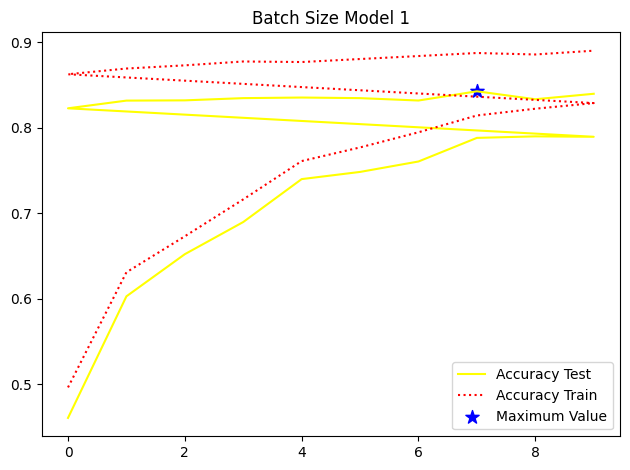

In [ ]:
  # Plot Train Accuracy vs Test Accuracy
  plt.plot(epochs, val1_acc, label="Accuracy Test", color="yellow", linestyle='-')
  plt.plot(epochs, train1_acc, label="Accuracy Train", color="red",linestyle=':')
  plt.scatter([max_epoch], [max_validation],color="blue", marker="*", label="Maximum Value", s=100 )
  plt.title("Batch Size Model 1")
  plt.legend()
  plt.tight_layout()
  plt.show()

#Varied the learning rate [0.1, 0.01, 0.001, 0.0001] on fixed batch size and fixed no of epoch to observe the effect of varying the epoch size</br>
Results for lr = 0.1 have been shown above  

In [ ]:
#Model1 WITH DIFFERENT LEARNING RATE
# Parameters
batch_size=512
val_batch_size=100
num_epochs=10
learning_rate=[0.01, 0.001, 0.0001]

dev=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

max_validation = 0
max_epoch=0
val2_acc=[]
train2_acc=[]
epochs=[]

In [ ]:
# Loop over different learning rates
for lr_no in range(len(learning_rate)):
  
  # Data loaders for training, training accuracy evaluation, and validation
  train_loader = torch.utils.data.DataLoader(cifar_transformed, batch_size=batch_size, shuffle=True, num_workers=4)
  train_acc_loader = torch.utils.data.DataLoader(cifar_transformed, batch_size=val_batch_size, shuffle=False, num_workers=4)
  val_loader = torch.utils.data.DataLoader(cifar_val_transformed, batch_size=val_batch_size, shuffle=False, num_workers=4)

  # Create model, move it to device
  resnet18 = model1
  resnet18 = resnet18.to(dev)

  # Define loss function, optimizer and scheduler
  loss_func = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(resnet18.parameters(), lr=learning_rate[lr_no], momentum=0.9, weight_decay=5e-4)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)

  # Loop over epochs
  for i in range(num_epochs):
    # Training
    for imgs, labels in train_loader:
      if dev is not None:
        imgs, labels = imgs.to(dev), labels.to(dev)
      out = resnet18(imgs)
      loss = loss_func(out, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    
    # Evaluation of validation accuracy
    correct_val = 0
    total_val = 0
    # Evaluation of training accuracy
    correct_train_acc = 0
    total_train_acc = 0

    # Testing
    with torch.no_grad():
      for imgs, labels in val_loader:
        if dev is not None:
          imgs, labels = imgs.to(dev), labels.to(dev)
        outputs = resnet18(imgs) 
        _, predicted = torch.max(outputs, dim=1) 
        total_val += labels.shape[0]
        correct_val += int((predicted == labels).sum())
      val2_acc.append(correct_val/total_val)

      # Compute loss and accuracy on training data
      for train_acc_imgs, train_acc_labels in train_acc_loader:
        if dev is not None:
          train_acc_imgs, train_acc_labels = train_acc_imgs.to(dev), train_acc_labels.to(dev)
        train_acc_out = resnet18(train_acc_imgs)
        _, train_acc_predicted = torch.max(train_acc_out, dim=1)
        total_train_acc += train_acc_labels.shape[0]
        correct_train_acc += int((train_acc_predicted == train_acc_labels).sum())
      train2_acc.append(correct_train_acc/total_train_acc)

      # Track best validation accuracy and corresponding epoch
      if correct_val/total_val > max_validation:
        max_validation = correct_val/total_val
        max_epoch = i

    epochs.append(i)

    # Print training and validation accuracy every epoch
    if i%1==0:
      print("Epoch no %d:\t Train Loss: %f \t Train Accuracy: %f \t Validation Accuracy: %f" % (i+1, float(loss), correct_train_acc / total_train_acc, correct_val / total_val))
    
    # Update learning rate using the scheduler
    scheduler.step()

  print(max_validation)


Epoch no 1:	 Train Loss: 1.559082 	 Train Accuracy: 0.424980 	 Validation Accuracy: 0.435500
Epoch no 2:	 Train Loss: 1.350326 	 Train Accuracy: 0.510760 	 Validation Accuracy: 0.506000
Epoch no 3:	 Train Loss: 1.219319 	 Train Accuracy: 0.566680 	 Validation Accuracy: 0.554100
Epoch no 4:	 Train Loss: 1.080049 	 Train Accuracy: 0.623520 	 Validation Accuracy: 0.605900
Epoch no 5:	 Train Loss: 0.976655 	 Train Accuracy: 0.656920 	 Validation Accuracy: 0.643600
Epoch no 6:	 Train Loss: 0.984496 	 Train Accuracy: 0.679920 	 Validation Accuracy: 0.655500
Epoch no 7:	 Train Loss: 0.829843 	 Train Accuracy: 0.703400 	 Validation Accuracy: 0.673000
Epoch no 8:	 Train Loss: 0.801193 	 Train Accuracy: 0.714540 	 Validation Accuracy: 0.686800
Epoch no 9:	 Train Loss: 0.682460 	 Train Accuracy: 0.721560 	 Validation Accuracy: 0.689100
Epoch no 10:	 Train Loss: 0.690344 	 Train Accuracy: 0.742400 	 Validation Accuracy: 0.704600
0.7046
Epoch no 1:	 Train Loss: 0.650053 	 Train Accuracy: 0.761120 	

In [ ]:
#Model2 WITH DIFFERENT LR
# Parameters
batch_size=512
val_batch_size=100
num_epochs=10
learning_rate=[0.01, 0.001, 0.0001]

dev=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

max_validation = 0
max_epoch=0
valsmall_acc=[]
trainsmall_acc=[]
epochs=[]

for lr_no in range(len(learning_rate)):
  # Train/Test Data
  train_loader=torch.utils.data.DataLoader(cifar_transformed,batch_size=batch_size,shuffle=True, num_workers=4)
  train_acc_loader=torch.utils.data.DataLoader(cifar_transformed,batch_size=val_batch_size,shuffle=False, num_workers=4)
  val_loader = torch.utils.data.DataLoader(cifar_val_transformed, batch_size=val_batch_size, shuffle=False, num_workers=4)

  # Model
  resnet18 =model2
  resnet18=resnet18.to(dev)
  loss_func= torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(resnet18.parameters(), lr=learning_rate[lr_no], momentum=0.9, weight_decay=5e-4)
  scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=100)

  for i in range(num_epochs):
    # Training
    for imgs, labels in train_loader:
      if dev is not None:
        imgs,labels=imgs.to(dev),labels.to(dev)
      out= resnet18(imgs)
      loss=loss_func(out,labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    
    correct_val = 0
    total_val = 0
    correct_train_acc=0
    total_train_acc=0
    # Testing
    with torch.no_grad():
      for imgs, labels in val_loader:
        if dev is not None:
          imgs,labels=imgs.to(dev),labels.to(dev)
        outputs = resnet18(imgs) 
        _, predicted = torch.max(outputs, dim=1) 
        total_val += labels.shape[0]
        correct_val += int((predicted == labels).sum())
      valsmall_acc.append(correct_val/total_val)

    # Compute Loss and Accuracy on training data
      for train_acc_imgs,train_acc_labels in train_acc_loader:
        if dev is not None:
          train_acc_imgs,train_acc_labels=train_acc_imgs.to(dev),train_acc_labels.to(dev)
        train_acc_out=resnet18(train_acc_imgs)
        _, train_acc_predicted = torch.max(train_acc_out, dim=1)
        total_train_acc += train_acc_labels.shape[0]
        correct_train_acc += int((train_acc_predicted == train_acc_labels).sum())
        # minibatch_acc = accuracy(train_acc, train_acc_labels,1)[0]
        # print("Top-1 training accuracy for minibatch", minibatch_acc)
      trainsmall_acc.append(correct_train_acc/total_train_acc)
      
      
      if correct_val/total_val > max_validation:
        max_validation=correct_val/total_val
        max_epoch=i
    epochs.append(i)

    

    if i%1==0:
      print("Epoch no %d:\t Train Loss: %f \t Train Accuracy: %f \t Validation Accuracy: %f" % (i+1, float(loss), correct_train_acc / total_train_acc, correct_val / total_val))
    
    scheduler.step()

  print(max_validation)



Epoch no 1:	 Train Loss: 0.304700 	 Train Accuracy: 0.864900 	 Validation Accuracy: 0.788100
Epoch no 2:	 Train Loss: 0.414667 	 Train Accuracy: 0.867700 	 Validation Accuracy: 0.790300
Epoch no 3:	 Train Loss: 0.459256 	 Train Accuracy: 0.867680 	 Validation Accuracy: 0.786300
Epoch no 4:	 Train Loss: 0.312795 	 Train Accuracy: 0.867120 	 Validation Accuracy: 0.795100
Epoch no 5:	 Train Loss: 0.333094 	 Train Accuracy: 0.866340 	 Validation Accuracy: 0.789100
Epoch no 6:	 Train Loss: 0.387988 	 Train Accuracy: 0.866200 	 Validation Accuracy: 0.794700
Epoch no 7:	 Train Loss: 0.316807 	 Train Accuracy: 0.868560 	 Validation Accuracy: 0.785700
Epoch no 8:	 Train Loss: 0.402478 	 Train Accuracy: 0.866960 	 Validation Accuracy: 0.789400
Epoch no 9:	 Train Loss: 0.446762 	 Train Accuracy: 0.867720 	 Validation Accuracy: 0.785600
Epoch no 10:	 Train Loss: 0.334962 	 Train Accuracy: 0.868020 	 Validation Accuracy: 0.792800
0.7951
Epoch no 1:	 Train Loss: 0.341429 	 Train Accuracy: 0.872020 	

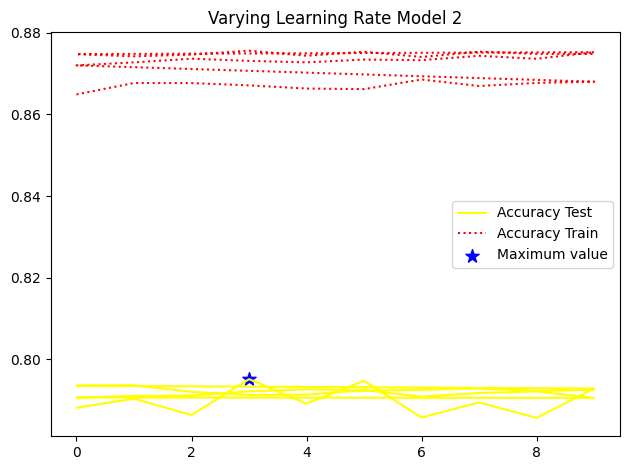

In [ ]:
# Plot Train Accuracy vs Test Accuracy
plt.plot(epochs, valsmall_acc, label="Accuracy Test", color="yellow", linestyle='-')
plt.plot(epochs, trainsmall_acc, label="Accuracy Train", color="red",linestyle=':')
plt.scatter([max_epoch], [max_validation],color="blue", marker="*", label="Maximum value", s=100 )
plt.title("Varying Learning Rate Model 2")
plt.legend()
plt.tight_layout()
plt.show()

**Comparison of above models with varying parameters**

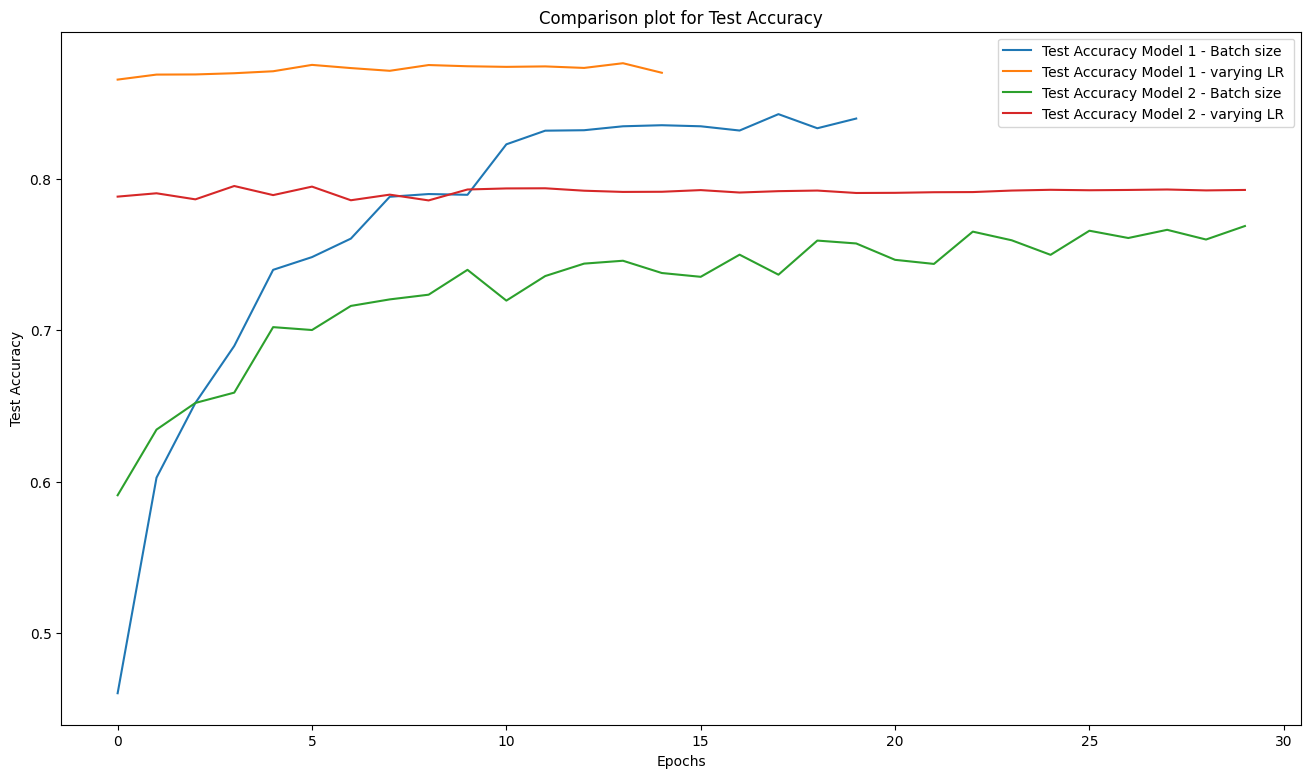

In [ ]:
#Create a figure and axis object with a size of 16x9
fig, ax = plt.subplots(figsize=(16,9))

#Set the title of the plot
plt.title('Comparison plot for Test Accuracy')

#Plot the test accuracy data for each model and label them accordingly
plt.plot(val1_acc, label='Test Accuracy Model 1 - Batch size')
plt.plot(val2_acc, label='Test Accuracy Model 1 - varying LR')
plt.plot(val3_acc, label='Test Accuracy Model 2 - Batch size')
plt.plot(valsmall_acc, label='Test Accuracy Model 2 - varying LR ')

#Add a legend to the plot
plt.legend()

#Set the x-label and y-label of the plot
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy")

#Display the plot
plt.show()





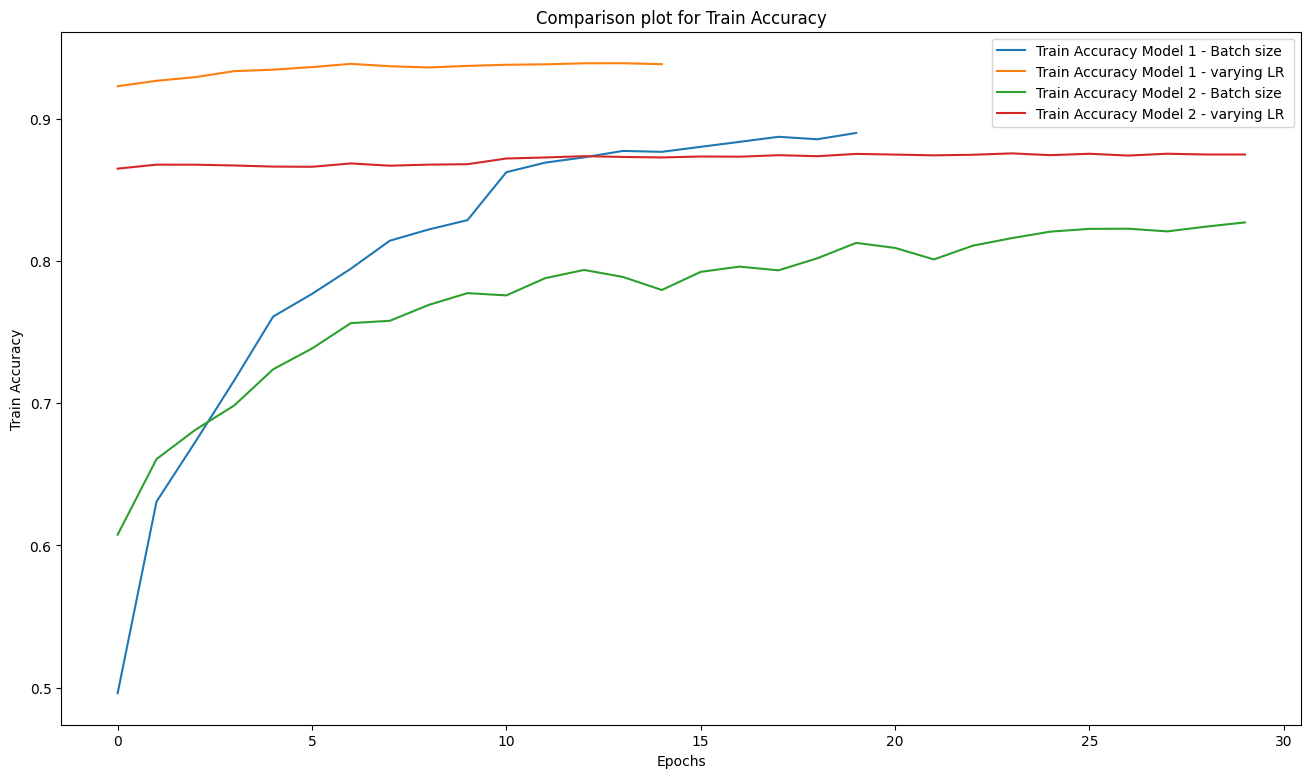

In [ ]:
# Create a figure and axis object with the specified size
fig, ax = plt.subplots(figsize=(16,9))

# Set the title of the plot
plt.title('Comparison plot for Train Accuracy')

# Plot the train accuracy values for each experiment using the plot function of matplotlib
plt.plot(train1_acc, label='Train Accuracy Model 1 - Batch size')
plt.plot(train2_acc, label='Train Accuracy Model 1 - varying LR')
plt.plot(train3_acc, label='Train Accuracy Model 2 - Batch size')
plt.plot(trainsmall_acc, label='Train Accuracy Model 2 - varying LR ')

# Set the legend for the plot
plt.legend()

# Set the x and y labels for the plot
plt.xlabel("Epochs")
plt.ylabel("Train Accuracy")

# Display the plot
plt.show()
